In [1]:
import numpy as np
import coop_post_processing as cpp
import healpy as hp
import warnings
warnings.filterwarnings('ignore')
from astropy import wcs
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18 as cosmo
import astropy.units as u
import matplotlib as mpl
font = {'size'   : 16}
mpl.rc('font', **font)

In [2]:
def get_vector_components(rot_angle):
    U_arr = np.zeros(len(rot_angle))
    V_arr = np.zeros(len(rot_angle))
    m = 0
    for r in rot_angle:

        if (r <= np.pi/2.) or (r > 3*np.pi/2.):
            U = 1/np.sqrt(1+np.tan(r)**2)
        else:
            U = -1/np.sqrt(1+np.tan(r)**2)
        V = U * np.tan(r)
        U_arr[m] = U
        V_arr[m] = V
        m += 1
    return U_arr, V_arr

In [3]:
angle, ra, dec = cpp.peakinfo_radec("/mnt/scratch-lustre/mlokken/stacking/ACTxDES_paper2/0/ACTxDES_lambdagt20_reg0_z_0pt4_0pt55_20pt0_75pctmaglim_pks.fits")


In [40]:
f = hp.read_map("/mnt/raid-cita/mlokken/data/number_density_maps/maglim/odmap_75_z_0pt4_0pt55.fits")
fsmooth = hp.smoothing(f, fwhm=np.deg2rad(37/60.))


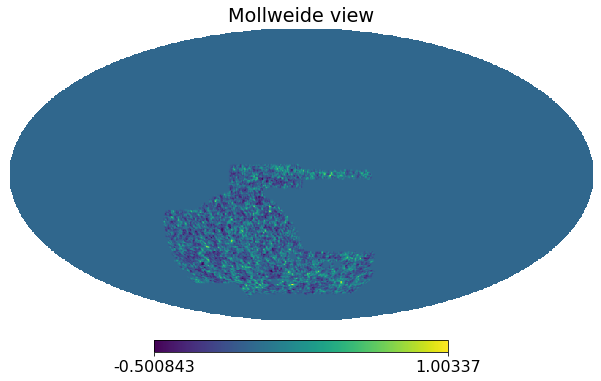

In [41]:
hp.mollview(fsmooth)

[400. 320.]
[  5.5 -56. ]
[-0.00625  0.00625]


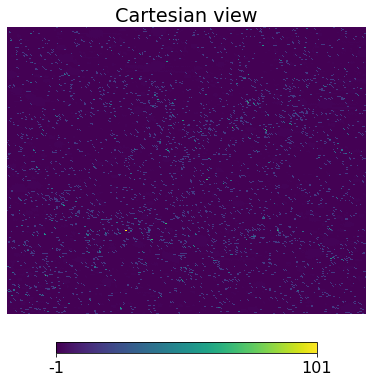

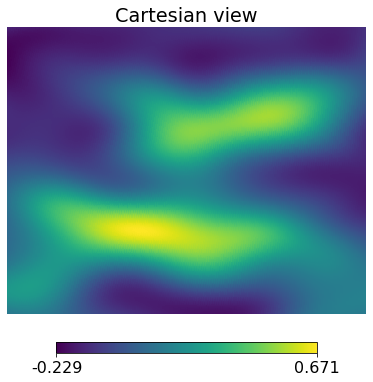

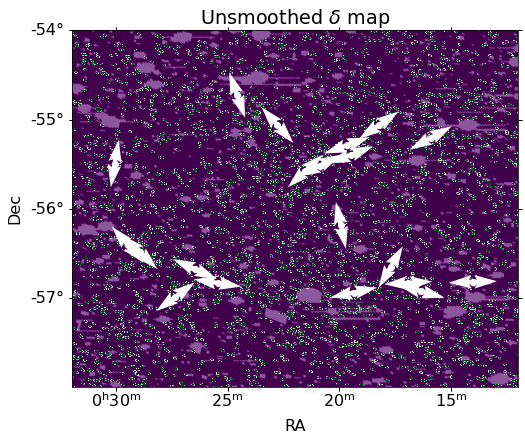

<Figure size 432x288 with 0 Axes>

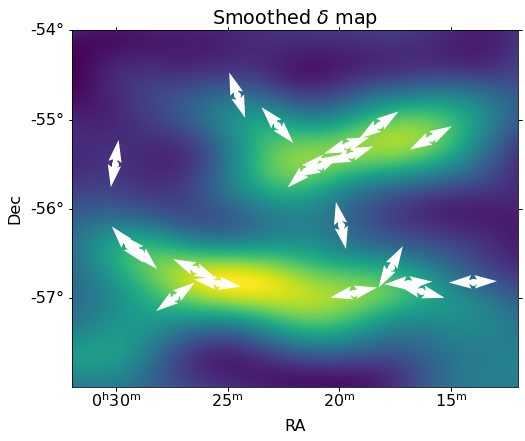

In [64]:
# Plot all clusters
lonmin=3
lonmax=8
latmin=-58
latmax=-54
od_map_flat = hp.cartview(f, lonra=[lonmin,lonmax], latra=[latmin,latmax], return_projected_map=True)
od_smthmap_flat = hp.cartview(fsmooth, lonra=[lonmin,lonmax], latra=[latmin,latmax], return_projected_map=True)
condition = (ra>lonmin) & (ra < lonmax) & (dec>latmin) & (dec<latmax)
w = wcs.WCS(naxis=2)
height = float(od_map_flat.shape[0])
length = float(od_map_flat.shape[1])
cdeltaX, crvalX = (lonmin-lonmax)/length, (lonmin+lonmax)/2.
cdeltaY, crvalY = (latmax-latmin)/height, (latmin+latmax)/2.
w.wcs.crpix = length/2., height/2.
print(w.wcs.crpix)
w.wcs.crval = [crvalX,crvalY]
print(w.wcs.crval)
w.wcs.cdelt = np.array([cdeltaX,cdeltaY])
print(w.wcs.cdelt)
w.wcs.ctype = ["RA", "DEC"]

# Make the figure
plt.figure(figsize=[8,8])
Xpix,Ypix = w.all_world2pix(ra[condition],dec[condition],0)
nrows = 1
ax1 = plt.subplot(nrows, 1, 1, projection=w)
ax1.imshow(od_map_flat, vmax=5, cmap='PRGn')
ax1.set_xticks([])
ax1.set_xticklabels([])
cm = plt.get_cmap("coolwarm")
U_arr, V_arr = get_vector_components(angle[condition])
ax1.scatter(Xpix,Ypix,color='w')
ax1.quiver(Xpix,Ypix, U_arr, -V_arr, width=0.01, color = 'w', scale = 3, scale_units = 'inches')
ax1.quiver(Xpix,Ypix, -U_arr, V_arr, width=0.01, color = 'w', scale = 3, scale_units = 'inches')
plt.xlabel("RA")
plt.ylabel("Dec")
plt.title(r"Unsmoothed $\delta$ map")
plt.show()
plt.clf()

# Make the figure
plt.figure(figsize=[8,8])
Xpix,Ypix = w.all_world2pix(ra[condition],dec[condition],0)
nrows = 1
ax1 = plt.subplot(nrows, 1, 1, projection=w)
ax1.imshow(od_smthmap_flat)
ax1.set_xticks([])
ax1.set_xticklabels([])
cm = plt.get_cmap("coolwarm")
U_arr, V_arr = get_vector_components(angle[condition])
ax1.scatter(Xpix,Ypix,color='w')
ax1.quiver(Xpix,Ypix, U_arr, -V_arr, width=0.01, color = 'w', scale = 3, scale_units = 'inches')
ax1.quiver(Xpix,Ypix, -U_arr, V_arr, width=0.01, color = 'w', scale = 3, scale_units = 'inches')
plt.title(r"Smoothed $\delta$ map")
plt.xlabel("RA")
plt.ylabel("Dec")


In [17]:
test_path = "/mnt/scratch-lustre/mlokken/pkpatch/number_density_maps/fullsky/1pt5E12_to_1E15_msun/maglim_masked/"
# unmasked Websky
angle_um, ra_um, dec_um = cpp.peakinfo_radec(test_path + "unmasked_peaks.fits")
angle_m, ra_m, dec_m    = cpp.peakinfo_radec(test_path + "masked_peaks.fits")

In [18]:
len(ra_um), len(ra_m)

(5324034, 5324034)

In [7]:
um = hp.read_map(test_path + "odmap_all_z_0pt55_0pt7.fits")
m  = hp.read_map(test_path + "odmap_all_z_0pt55_0pt7_masked.fits")
umsmooth = hp.smoothing(um, fwhm=np.deg2rad(29/60.))
msmooth  = hp.smoothing(m, fwhm=np.deg2rad(29/60.))


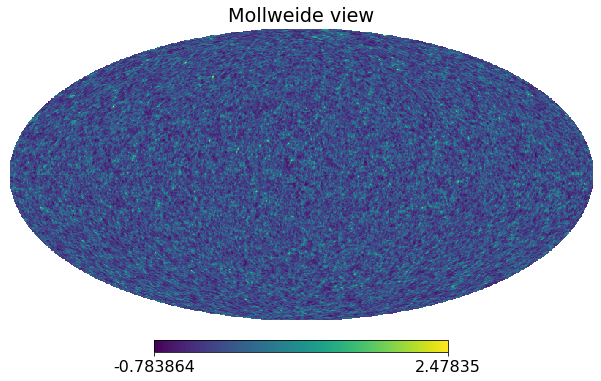

In [8]:
hp.mollview(umsmooth)

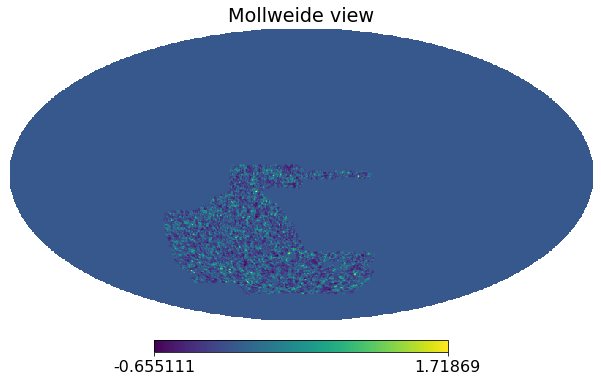

In [9]:
hp.mollview(msmooth)

[400. 300.]
[10.  -6.5]
[-0.005  0.005]


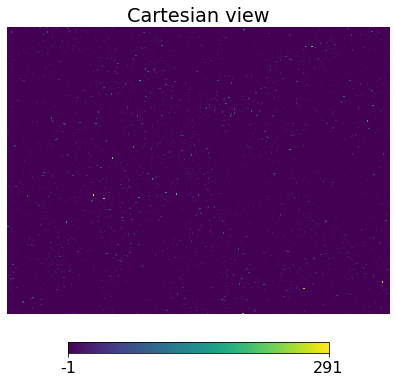

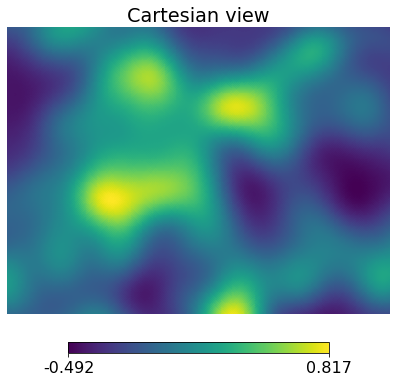

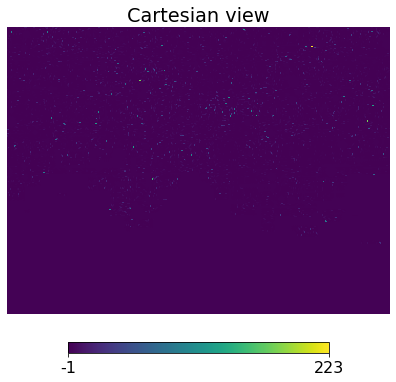

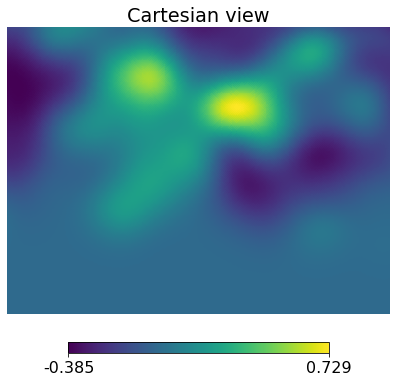

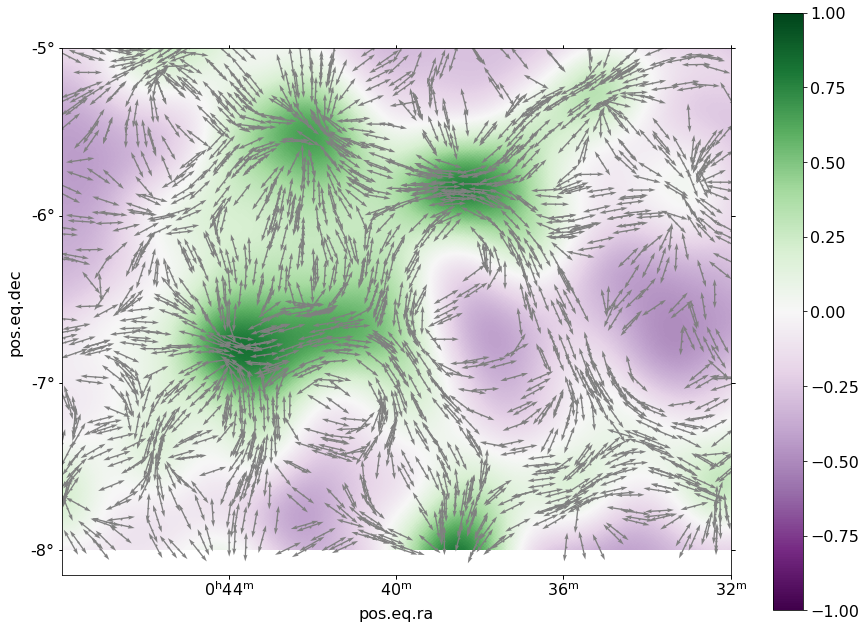

<Figure size 432x288 with 0 Axes>

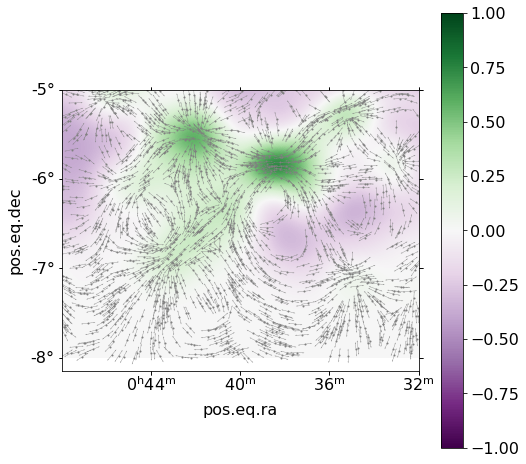

<Figure size 432x288 with 0 Axes>

In [133]:
# Plot all clusters
lonmin=8
lonmax=12
latmin=-8
latmax=-5
od_map_flat_um     = hp.cartview(um, lonra=[lonmin,lonmax], latra=[latmin,latmax], return_projected_map=True)
od_smthmap_flat_um = hp.cartview(umsmooth, lonra=[lonmin,lonmax], latra=[latmin,latmax], return_projected_map=True)

od_map_flat_m     = hp.cartview(m, lonra=[lonmin,lonmax], latra=[latmin,latmax], return_projected_map=True)
od_smthmap_flat_m = hp.cartview(msmooth, lonra=[lonmin,lonmax], latra=[latmin,latmax], return_projected_map=True)

condition_um = (ra_um>lonmin) & (ra_um < lonmax) & (dec_um>latmin) & (dec_um<latmax)
condition_m  = (ra_m>lonmin) & (ra_m < lonmax) & (dec_m>latmin) & (dec_m<latmax)
w = wcs.WCS(naxis=2)
height = float(od_map_flat_m.shape[0])
length = float(od_map_flat_m.shape[1])
cdeltaX, crvalX = (lonmin-lonmax)/length, (lonmin+lonmax)/2.
cdeltaY, crvalY = (latmax-latmin)/height, (latmin+latmax)/2.
w.wcs.crpix = length/2., height/2.
print(w.wcs.crpix)
w.wcs.crval = [crvalX,crvalY]
print(w.wcs.crval)
w.wcs.cdelt = np.array([cdeltaX,cdeltaY])
print(w.wcs.cdelt)
w.wcs.ctype = ["RA", "DEC"]

# Make the figure
plt.figure(figsize=[15,11])
Xpix_um,Ypix_um = w.all_world2pix(ra_um[condition_um],dec_um[condition_um],0)
Xpix_m,Ypix_m   = w.all_world2pix(ra_m[condition_m],dec_m[condition_m],0)
U_arr_um, V_arr_um = get_vector_components(angle_um[condition_um])
U_arr_m, V_arr_m   = get_vector_components(angle_m[condition_m])

nrows = 1
ax1 = plt.subplot(nrows, 1, 1, projection=w)
unmasked = ax1.imshow(od_smthmap_flat_um, vmin=-1, vmax=1, cmap='PRGn')
ax1.set_xticks([])
plt.colorbar(unmasked)
ax1.set_xticklabels([])
ax1.scatter(Xpix_um,Ypix_um,color='gray', s=1)
ax1.quiver(Xpix_um,Ypix_um, U_arr_um, -V_arr_um, width=0.002, color = 'gray', scale = 5, scale_units = 'inches')
ax1.quiver(Xpix_um,Ypix_um, -U_arr_um, V_arr_um, width=0.002, color = 'gray', scale = 5, scale_units = 'inches')
plt.savefig("/home/mlokken/oriented_stacking/plots/paper2/websky_manyhalo_orientations_visual.png", dpi=500)
plt.show()
plt.clf()

plt.figure(figsize=[8,8])
ax1 = plt.subplot(nrows, 1, 1, projection=w)
masked = ax1.imshow(od_smthmap_flat_m, vmax=1, vmin=-1, cmap='PRGn')
plt.colorbar(masked)
ax1.set_xticks([])
ax1.set_xticklabels([])
ax1.scatter(Xpix_m,Ypix_m,color='gray', s=1)
ax1.quiver(Xpix_m,Ypix_m, U_arr_m, -V_arr_m, width=0.001, color = 'gray', scale = 10, scale_units = 'inches')
ax1.quiver(Xpix_m,Ypix_m, -U_arr_m, V_arr_m, width=0.001, color = 'gray', scale = 10, scale_units = 'inches')
plt.show()
plt.clf()


# ax2 = plt.subplot(nrows, 1, 1, projection=w)
# ax2.scatter(Xpix_m,Ypix_m,color='w')
# ax2.quiver(Xpix_m,Ypix_m, U_arr_m, -V_arr_m, width=0.01, color = 'w', scale = 3, scale_units = 'inches')
# ax2.quiver(Xpix_m,Ypix_m, -U_arr_m, V_arr_m, width=0.01, color = 'w', scale = 3, scale_units = 'inches')

# plt.xlabel("RA")
# plt.ylabel("Dec")
# plt.title(r"Unsmoothed $\delta$ map")



In [44]:
mask = hp.read_map("/mnt/raid-cita/mlokken/data/masks/y3_gold_2.2.1_RING_joint_redmagic_v0.5.1_wide_maglim_v2.2_mask_hpx_4096.fits")

In [47]:
flatmask.shape

(800, 800)

[400. 400.]
[  6.5 -51. ]
[-0.0025  0.0025]


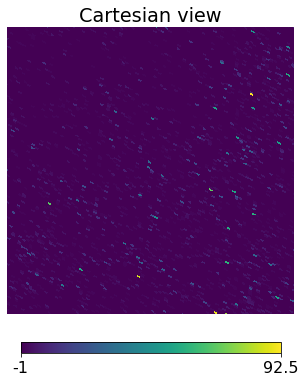

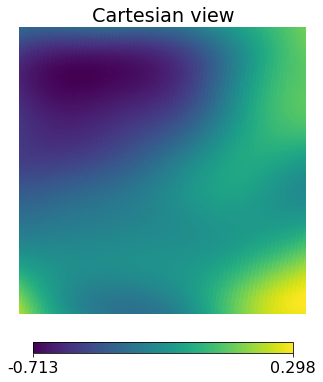

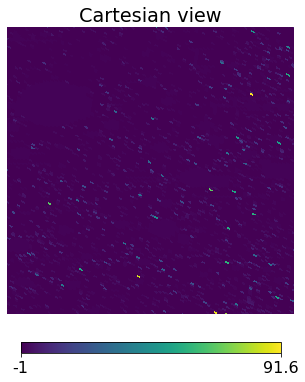

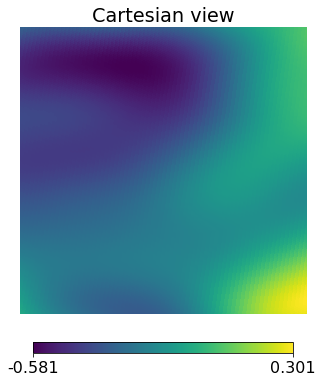

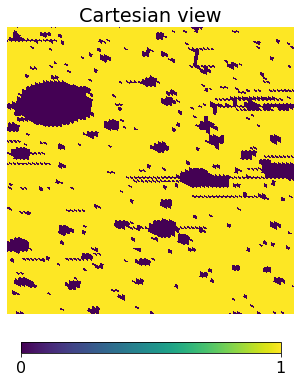

In [58]:
# Plot all clusters
lonmin=5.5
lonmax=7.5
latmin=-52
latmax=-50
od_map_flat_um     = hp.cartview(um, lonra=[lonmin,lonmax], latra=[latmin,latmax], return_projected_map=True)
od_smthmap_flat_um = hp.cartview(umsmooth, lonra=[lonmin,lonmax], latra=[latmin,latmax], return_projected_map=True)

od_map_flat_m     = hp.cartview(m, lonra=[lonmin,lonmax], latra=[latmin,latmax], return_projected_map=True)
od_smthmap_flat_m = hp.cartview(msmooth, lonra=[lonmin,lonmax], latra=[latmin,latmax], return_projected_map=True)

flatmask = hp.cartview(mask, lonra=[lonmin,lonmax], latra=[latmin,latmax], return_projected_map=True)
nomask   = np.ones(flatmask.shape)

condition_um = (ra_um>lonmin) & (ra_um < lonmax) & (dec_um>latmin) & (dec_um<latmax)
condition_m  = (ra_m>lonmin) & (ra_m < lonmax) & (dec_m>latmin) & (dec_m<latmax)
w = wcs.WCS(naxis=2)
height = float(od_map_flat_m.shape[0])
length = float(od_map_flat_m.shape[1])
cdeltaX, crvalX = (lonmin-lonmax)/length, (lonmin+lonmax)/2.
cdeltaY, crvalY = (latmax-latmin)/height, (latmin+latmax)/2.
w.wcs.crpix = length/2., height/2.
print(w.wcs.crpix)
w.wcs.crval = [crvalX,crvalY]
print(w.wcs.crval)
w.wcs.cdelt = np.array([cdeltaX,cdeltaY])
print(w.wcs.cdelt)
w.wcs.ctype = ["RA", "DEC"]



<Figure size 720x720 with 0 Axes>

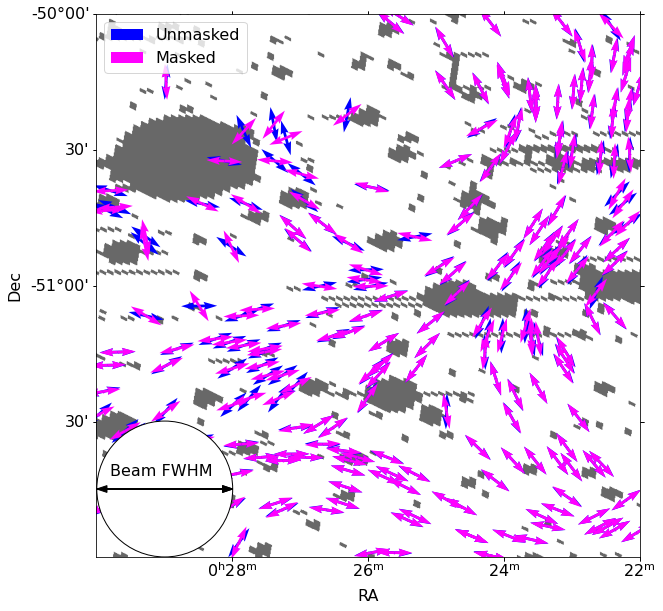

In [121]:
# Make the figure
plt.figure(figsize=[10,10])
Xpix_um,Ypix_um = w.all_world2pix(ra_um[condition_um],dec_um[condition_um],0)
Xpix_m,Ypix_m   = w.all_world2pix(ra_m[condition_m],dec_m[condition_m],0)
U_arr_um, V_arr_um = get_vector_components(angle_um[condition_um])
U_arr_m, V_arr_m   = get_vector_components(angle_m[condition_m])

c  = 'magenta'
c2 = 'blue'
sc = 4
wd = 0.005
# nrows = 1
# ax1 = plt.subplot(nrows, 1, 1, projection=w)
# unmasked = ax1.imshow(nomask, vmin=-1, vmax=1, cmap='gist_heat')
# ax1.set_xticks([])
# # plt.colorbar(unmasked)
# ax1.set_xticklabels([])
# ax1.scatter(Xpix_um,Ypix_um,color=c, s=1)
# ax1.quiver(Xpix_um,Ypix_um, U_arr_um, -V_arr_um, width=wd, color = c, scale = sc, scale_units = 'inches')
# ax1.quiver(Xpix_um,Ypix_um, -U_arr_um, V_arr_um, width=wd, color = c, scale = sc, scale_units = 'inches')
# plt.show()
# plt.clf()

plt.figure(figsize=[10,10])
ax1 = plt.subplot(1, 1, 1, projection=w)
masked = ax1.imshow(flatmask, cmap='Greys_r', vmin=-.5)
# plt.colorbar(masked)
ax1.set_xticks([])
ax1.set_xticklabels([])
ax1.scatter(Xpix_m,Ypix_m,color=c, s=1)
ax1.quiver(Xpix_um,Ypix_um, U_arr_um, -V_arr_um, width=wd, color = c2, scale = sc, scale_units = 'inches', label='Unmasked')
ax1.quiver(Xpix_um,Ypix_um, -U_arr_um, V_arr_um, width=wd, color = c2, scale = sc, scale_units = 'inches')
ax1.quiver(Xpix_m,Ypix_m, U_arr_m, -V_arr_m, width=wd, color = c, scale = sc, scale_units = 'inches', label='Masked')
ax1.quiver(Xpix_m,Ypix_m, -U_arr_m, V_arr_m, width=wd, color = c, scale = sc, scale_units = 'inches')
plt.legend()
plt.text(20,120, "Beam FWHM")
circ = plt.Circle((100,100), 100, edgecolor='k', facecolor='w')
ax1.add_patch(circ)
arr  = plt.arrow(0,100,200,0, color='k', length_includes_head=True, head_width=10)
arr2 = plt.arrow(200,100,-200,0, color='k', length_includes_head=True, head_width=10)
ax1.add_patch(arr)
plt.xlabel("RA")
plt.ylabel("Dec")

plt.savefig("/home/mlokken/oriented_stacking/plots/paper2/websky_masking_test.png", dpi=300)